- [ ] A vs B plot
    - Use log evidence on seeing (un-)observed counts instead of probability
        - That is log evidence for unseen dataset (calculate for all at once using formula 8)
￼
            - Where s_hat is the see_data and k_ba are the counts in that data
    - Point: Small plot to show that our model is stable

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import math

sys.path.append("../")

In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [3]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

Use MCM paritioning from fitting but do not use the ML parameters/ found counts but the counts from the new dataset
1. load mcm partitioning
2. write function data to (un-)smoothed counts


In [4]:
# for each icc
# construct the count distribution given some dataset

# first load some example data
test_data = utils.load_test_data(digit=0)



In [5]:
# load example mcms


#     data = np.array([[int(s) for s in state] for state in see_data])

# ranks = np.genfromtxt(mcm_sample[sample_idx][run_idx][cat_idx],dtype=int,delimiter=1).sum(axis=1)


In [10]:
digit = 0

sample_sizes = [100, 1000, 2000, 3000]
letter = "A"

_, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter)

n_runs = min([len(i) for i in mcms_samplesizes])

evids = np.zeros((len(sample_sizes), n_runs)) # nr sample sizes, nr runs



other_letter = "B" if letter == "A" else "A"
print(letter, other_letter)

# see other letter
for sample_size_idx, sample_size in enumerate(sample_sizes):
    test_data = utils.recreate_dataset(other_letter, sample_size, seed=42) # FIXME check that we do this for both fixed and not fixed seeds

    mcms = mcms_samplesizes[sample_size_idx][:n_runs]
    for mcm_idx, mcm in enumerate(mcms):
        evids[sample_size_idx][mcm_idx] = utils.evidence_on_data(mcm[digit], test_data)/sample_size

# see own letter
evids_own = np.zeros((len(sample_sizes), n_runs)) # nr sample sizes, nr runs
for sample_size_idx, sample_size in enumerate(sample_sizes):
    test_data = utils.recreate_dataset(letter, sample_size, seed=42) # FIXME check that we do this for both fixed and not fixed seeds

    mcms = mcms_samplesizes[sample_size_idx][:n_runs]
    for mcm_idx, mcm in enumerate(mcms):
        evids_own[sample_size_idx][mcm_idx] = utils.evidence_on_data(mcm[digit], test_data)/sample_size


A B


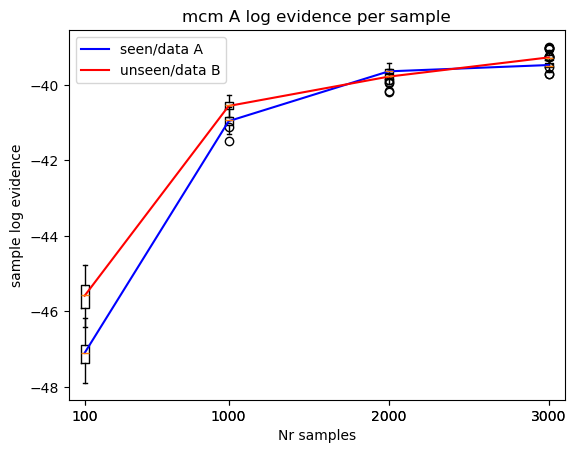

In [11]:
plt.figure()
plt.boxplot(evids.T, positions=sample_sizes,widths= 50)
plt.boxplot(evids_own.T, positions=sample_sizes,widths= 50)

plt.plot(sample_sizes,np.mean(evids_own,axis=1), label=f"seen/data {letter}", color="blue")
plt.plot(sample_sizes,np.mean(evids,axis=1),label=f"unseen/data {other_letter}", color="red")

plt.xlim((min(sample_sizes)-100,max(sample_sizes)+100))
plt.ylabel("sample log evidence")
plt.xlabel("Nr samples")
plt.title(f"mcm {letter} log evidence per sample")
plt.legend()
plt.show()